In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

In [2]:
main = pd.read_csv("/Users/DataSci/Desktop/Flatiron/Assignments/Twitter/mainfordj.csv", index_col = 0)
tfidf_df = pd.read_csv("/Users/DataSci/Desktop/Flatiron/Assignments/Twitter/lda_tfidf_df.csv", index_col = 0)

In [3]:
main.shape, tfidf_df.shape

((983566, 14), (983566, 10))

In [4]:
main.isna().sum()

date                0
username            0
tweet               0
replies_count       0
retweets_count      0
likes_count         0
search_term         0
c_tweet             0
tokenized           0
filtered          320
delisted            0
sentiment           0
cleaned             0
not_filtered        0
dtype: int64

In [5]:
main.dropna(subset=["filtered"], inplace=True)

In [6]:
main.drop(columns=["cleaned", "not_filtered"], inplace=True)

In [7]:
main.isna().sum()

date              0
username          0
tweet             0
replies_count     0
retweets_count    0
likes_count       0
search_term       0
c_tweet           0
tokenized         0
filtered          0
delisted          0
sentiment         0
dtype: int64

In [8]:
tfidf_df.isna().sum()

topic0    0
topic1    0
topic2    0
topic3    0
topic4    0
topic5    0
topic6    0
topic7    0
topic8    0
topic9    0
dtype: int64

In [9]:
main.shape, tfidf_df.shape

((983246, 12), (983566, 10))

In [10]:
main.reset_index(drop=True, inplace = True)

In [11]:
tfidf_df.reset_index(drop=True, inplace = True)

In [13]:
main_df = pd.concat([main, tfidf_df], axis=1)

In [14]:
main_df.isna().sum()

date              320
username          320
tweet             320
replies_count     320
retweets_count    320
likes_count       320
search_term       320
c_tweet           320
tokenized         320
filtered          320
delisted          320
sentiment         320
topic0              0
topic1              0
topic2              0
topic3              0
topic4              0
topic5              0
topic6              0
topic7              0
topic8              0
topic9              0
dtype: int64

In [15]:
main_df.dropna(inplace=True)

In [16]:
main_df.shape

(983246, 22)

In [18]:
main.search_term.nunique()

8

### Importing Textblob to meaure subjectivity score on the 

In [19]:
from textblob import TextBlob

In [21]:
main_df['subjectivity_score'] = main_df['c_tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [22]:
main_df.columns.to_list()

['date',
 'username',
 'tweet',
 'replies_count',
 'retweets_count',
 'likes_count',
 'search_term',
 'c_tweet',
 'tokenized',
 'filtered',
 'delisted',
 'sentiment',
 'topic0',
 'topic1',
 'topic2',
 'topic3',
 'topic4',
 'topic5',
 'topic6',
 'topic7',
 'topic8',
 'topic9',
 'subjectivity_score']

In [23]:
topic_df = main_df.iloc[:,12:21]
high_score = topic_df.idxmax(axis=1)
main_df["max_topic"]=high_score

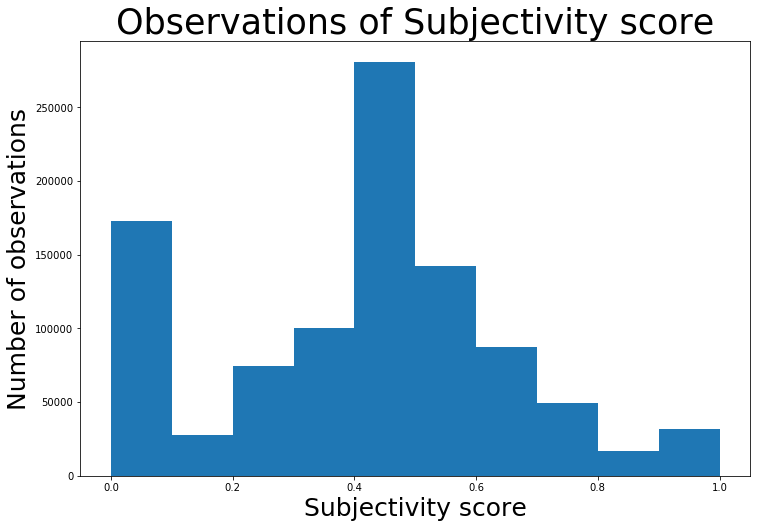

In [24]:
# plotting the spead of the subjectivity score
fig, ax = plt.subplots(figsize = (12,8))
plt.hist(main_df["subjectivity_score"])
plt.title("Observations of Subjectivity score", fontsize=35)
plt.ylabel("Number of observations", fontsize=25)
plt.xlabel("Subjectivity score", fontsize=25);

#### Categorizing retweet_counts, likes_counts, and replies_counts

In [25]:
main_df

,date,username,tweet,replies_count,retweets_count,likes_count,search_term,c_tweet,tokenized,filtered,delisted,sentiment,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,subjectivity_score,max_topic
0,2020-12-01,coolmuster,#iPhone12 #Android iPhone 12 vs Android’s best...,0.0,0.0,0.0,iphone 12,iphone android iphone vs android best it time ...,"['iphone', 'android', 'iphone', 'v', 'android'...","android, android, best, time, consider, switch...","android, android, best, time, consider, switch...",positive,0.887465,0.012504,0.012503,0.012504,0.012504,0.012504,0.012506,0.012503,0.012504,0.012503,0.300000,topic0
1,2020-12-01,nanaakuamensah4,@cuppymusic I'm asking DJ cuppy Please I want ...,0.0,0.0,0.0,iphone 12,asking dj cuppy please want an iphone,"['asking', 'dj', 'cuppy', 'please', 'want', 'a...","asking, dj, cuppy, please, want","asking, cuppy, please, want",positive,0.016679,0.016674,0.016674,0.849927,0.016674,0.016674,0.016674,0.016674,0.016674,0.016674,0.000000,topic3
2,2020-12-01,naija_pr,The moment Mercy Eke sprays her friend $3000 c...,0.0,1.0,3.0,iphone 12,the moment mercy eke sprays her friend cash an...,"['the', 'moment', 'mercy', 'eke', 'spray', 'he...","moment, mercy, eke, spray, friend, cash, gave,...","moment, mercy, eke, spray, friend, cash, gave,...",positive,0.011123,0.011122,0.011122,0.899898,0.011122,0.011122,0.011122,0.011126,0.011122,0.011122,0.000000,topic3
3,2020-12-01,holliebear80,@CraigStrife Aww back at you Mr S 😘 &amp; Appl...,0.0,0.0,0.0,iphone 12,aww back at you mr amp apple still the iphone ...,"['aww', 'back', 'at', 'you', 'mr', 'amp', 'app...","aww, back, mr, amp, apple, still, still, arriv...","aww, back, amp, still, still, arrived, guessin...",positive,0.302723,0.474885,0.000000,0.110264,0.086025,0.000000,0.000000,0.000000,0.000000,0.000000,0.505556,topic1
4,2020-12-01,justabussy,@PicsArtStudio umm I can’t press on the search...,1.0,0.0,1.0,iphone 12,umm can press on the search bar on the iphone ...,"['umm', 'can', 'press', 'on', 'the', 'search',...","umm, press, search, bar, hurry, fix","umm, press, search, bar, hurry, fix",neutral,0.611028,0.014312,0.014303,0.014312,0.274515,0.014303,0.014307,0.014301,0.014309,0.014309,0.000000,topic0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983241,2020-09-01,gettinready4god,@Rockprincess818 Our media is nothing but yet ...,0.0,0.0,0.0,silicon,our media is nothing but yet another megaphone...,"['our', 'medium', 'is', 'nothing', 'but', 'yet...","medium, nothing, yet, another, megaphone, like...","medium, nothing, yet, another, megaphone, like...",positive,0.000000,0.000000,0.000000,0.086257,0.092568,0.000000,0.092759,0.000000,0.688397,0.000000,0.000000,topic8
983242,2020-09-01,henrynoeljr,Silicon Valley Has Deep Pockets for African St...,0.0,0.0,1.0,silicon,silicon valley has deep pockets for african st...,"['silicon', 'valley', 'ha', 'deep', 'pocket', ...","silicon, valley, ha, deep, pocket, african, st...","silicon, valley, deep, pocket, african, startu...",neutral,0.000000,0.059652,0.136491,0.000000,0.000000,0.000000,0.298953,0.000000,0.000000,0.480879,0.133333,topic6
983243,2020-09-01,1mtiyazalam,"@BernieSanders Not going to work, these incite...",0.0,0.0,0.0,silicon,not going to work these incitements are well p...,"['not', 'going', 'to', 'work', 'these', 'incit...","going, work, incitement, well, planned, well, ...","going, work, incitement, well, planned, well, ...",positive,0.020014,0.020015,0.020014,0.020014,0.020014,0.020014,0.253458,0.246685,0.020017,0.359756,0.500000,topic6
983244,2020-09-01,jacobwohlreport,Wohl addresses his ban from Instagram/Facebook...,10.0,2.0,24.0,silicon,wohl addresses his ban from instagram facebook...,"['wohl', 'address', 'his', 'ban', 'from', 'ins...","wohl, address, ban, instagram, facebook, claim...","wohl, address, ban, instagram, facebook, claim...",negative,0.000000,0.000000,0.000000,0.151971,0.000000,0.000000,0.391555,0.000000,0.327698,0.

In [26]:
yes_retweet = []
for x in main_df["retweets_count"]:
    if x >= 1:
        yes_retweet.append(1)
    else: 
        yes_retweet.append(0)
        
        
main_df["yes_retweets"] = yes_retweet
#df.drop(columns = "retweets_count")
#main_df.drop(columns = "retweets_count", inplace = True)

In [27]:
yes_likes = []
for x in main_df["likes_count"]:
    if x >= 1:
        yes_likes.append(1)
    else: 
        yes_likes.append(0)
        
        
main_df["yes_likes"] = yes_likes

main_df.drop(columns = "likes_count", inplace = True)

In [28]:
yes_replies = []
for x in main_df["replies_count"]:
    if x >= 1:
        yes_replies.append(1)
    else: 
        yes_replies.append(0)
        
        
main_df["yes_replies"] = yes_replies

main_df.drop(columns = "replies_count", inplace = True)

In [29]:
main_df.to_csv("main_df.csv")

### Exploring the overall sentiment for each topic

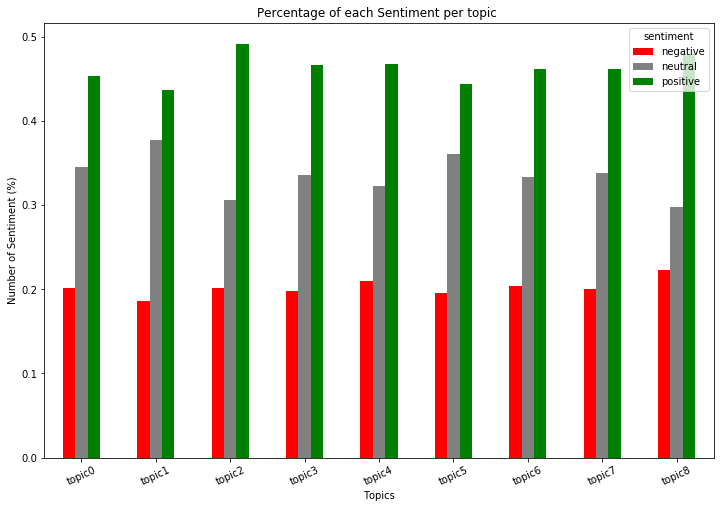

In [30]:
x = main_df.groupby("max_topic")["sentiment"].value_counts(normalize=True).unstack()


x.plot(kind = 'bar', figsize=(12,8), color =["red", "grey", "green"])
plt.title("Percentage of each Sentiment per topic ")
plt.ylabel("Number of Sentiment (%)")
plt.xlabel("Topics")
plt.xticks(rotation=25)
plt.savefig('images/sentiment_per_topic', bbox_inches = "tight");


### Exploring the overall sentiment for each search term

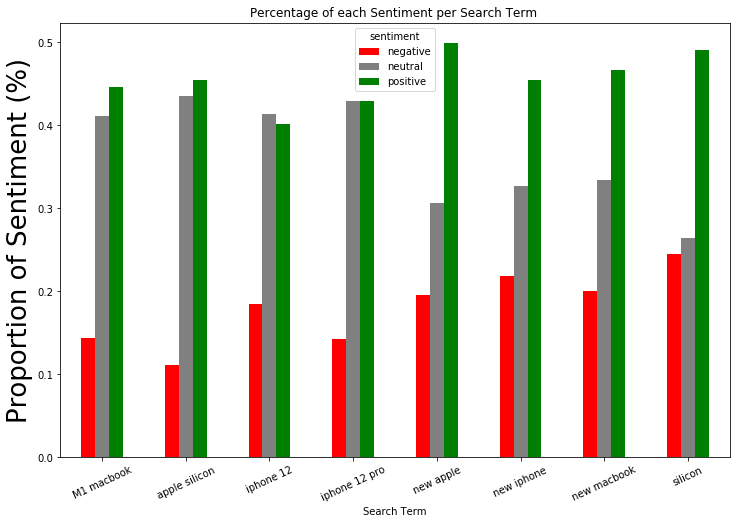

In [31]:
y = main_df.groupby("search_term")["sentiment"].value_counts(normalize=True).unstack()

y.plot(kind = 'bar', figsize=(12,8), color =["red", "grey", "green"])
plt.title("Percentage of each Sentiment per Search Term ")
plt.ylabel("Proportion of Sentiment (%)", fontsize=26)
plt.xlabel("Search Term")
plt.xticks(rotation=25)
plt.savefig('images/sentiment_per_search_term', bbox_inches = "tight");

In [32]:
main_df.shape

(983246, 25)